# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Цель исследования:

1. Определить факторы максимально влияющие на ценообразование на рынке недвижимости Ленинградской области.
2. Определить среднюю стоимость квадратного метра в населенных пунктах с наибольшим количеством объявлений.
3. Найти закономерности рынка недвижимости в период 2014-2019 гг.

Этапы исследования:
- Обзор данных.
- Предобработка данных.
- Добавление в таблицу необходимых для исследования столбцов.
- Анализ всех данных по Ленинградской области.
- Анализ данных по Санкт-Петербургу.
- Определение основных закономерностей рынка недвижимости.
- Выводы.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
display(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


В таблице очень много пропусков.

In [7]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000,23699.000,23699.000,23699.000,14504.000,23613.000,21796.000,23699.000,21421.000,12180.000,18157.000,18180.000,18181.000,8079.000,18181.000,9110.000,20518.000
mean,9.858,6541548.772,60.349,2.071,2.771,10.674,34.458,5.892,10.570,1.150,28793.672,14191.278,0.611,490.805,0.770,517.981,180.889
std,5.683,10887013.268,35.654,1.078,1.261,6.597,22.030,4.885,5.905,1.071,12630.881,8608.386,0.802,342.318,0.938,277.721,219.728
min,0.000,12190.000,12.000,0.000,1.000,1.000,2.000,1.000,1.300,0.000,0.000,181.000,0.000,1.000,0.000,13.000,1.000
25%,6.000,3400000.000,40.000,1.000,2.520,5.000,18.600,2.000,7.000,0.000,18585.000,9238.000,0.000,288.000,0.000,294.000,45.000
50%,9.000,4650000.000,52.000,2.000,2.650,9.000,30.000,4.000,9.100,1.000,26726.000,13098.500,0.000,455.000,1.000,502.000,95.000
75%,14.000,6800000.000,69.900,3.000,2.800,16.000,42.300,8.000,12.000,2.000,37273.000,16293.000,1.000,612.000,1.000,729.000,232.000
max,50.000,763000000.000,900.000,19.000,100.000,60.000,409.700,33.000,112.000,5.000,84869.000,65968.000,3.000,3190.000,3.000,1344.000,1580.000


Видим, что есть выбросы. Например, площадь 900 или 12 метров, 19 комнатные квартиры, 100-метровые потолки.

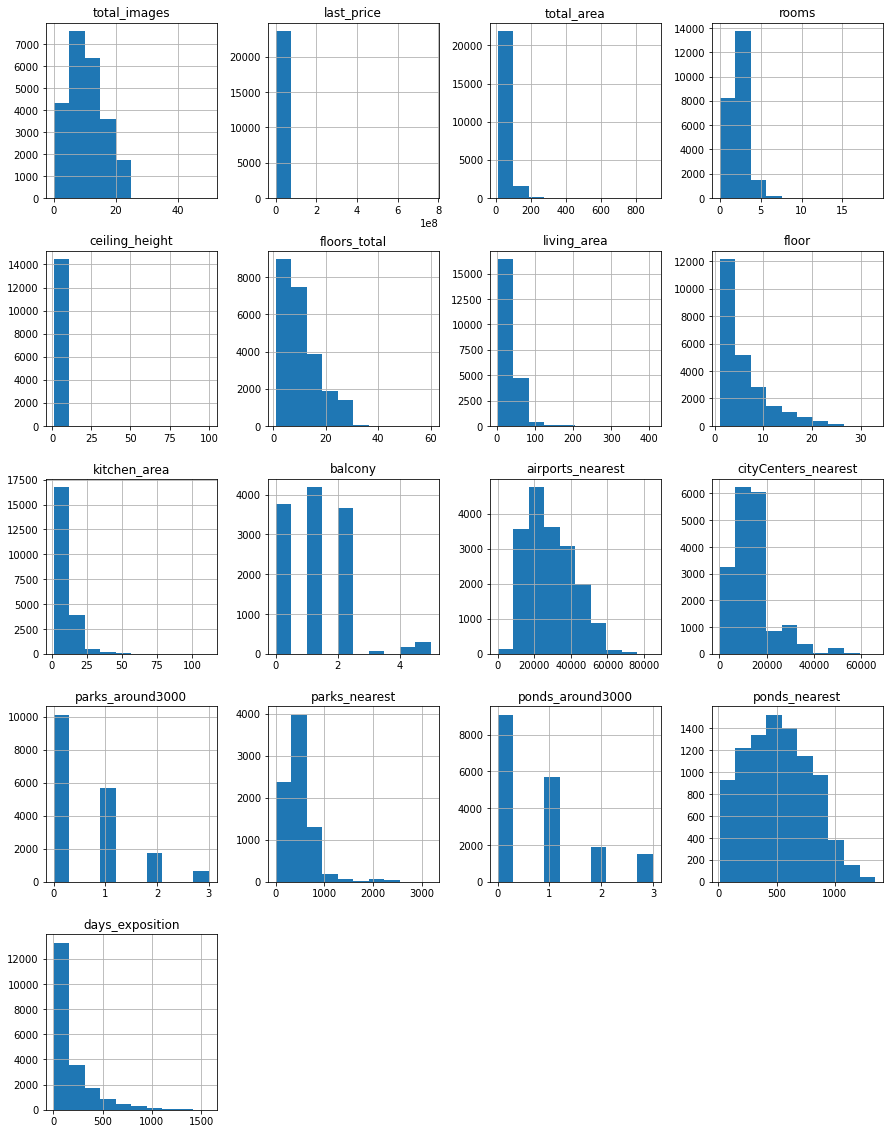

In [9]:
df.hist(figsize=(15, 20))
plt.show()

Странно выглядят графики с ценой, общей и кухонной площадью, количеством комнат и высотой потолков, скорее всего там и есть выбросы.

### Предобработка данных

#### Пропуски

В датафрейме очень много пропусков. С чем они могут быть связаны и как их можно заполнить:

<b>ceiling_height</b> - скорее всего высоту потолков не знают и не стали ее заполнять. Заполнить можно медианным значением в заивисимости от населенного пункта и этажности здания.

<b>floors_total</b> - скорее всего данное поле необязательное для заполнения. Заполнить можно по местоположению - населенному пункту.

<b>living_area и kitchen_area</b> - скорее всего данное поле необязательное для заполнения, либо продавцам было лень или некогда высчитывать данные. Попробуем заполнить данные  в зависимости от общей площади квартиры.

<b>is_apartment</b> - возможно отсутствующие данные означают, что квартира не апартаменты. В таком случае заполним пропуски False.

<b>balcony</b> - вероятно вместо NaN должен быть 0, т.е. в квартире нет балкона.

<b>locality_name</b> -  может быть продавцы посчитали, что размещая объявление в разделе Санкт-Петербург, населенный пунт автоматически проставится. Проверим по отдаленности от центра. Все, что в пределах 16 км от центра будет Санкт-Петербургом.

<b>cityCenters_nearest, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest</b> - эти данные зполняла система по картам, скоре всего если данные пропущены, значит рядом нет ни парков, ни аэропортов. Значит можно заполнить 0.

<b>days_exposition</b> - скорее всего объявление на сайте не было закрыто после продажи. Этим же можно объяснить "живучесть" объявления в течение нескольких лет. Здесь мы ничего заполнить не сможем.


<b>ceiling_height:</b> 

Посмотрим сколько всего пропусков в столбце с высотой потолков.

In [10]:
print('Пропусков в столбце ceiling_height:', df['ceiling_height'].isnull().sum())

Пропусков в столбце ceiling_height: 9195


Вероятно, что высота потолков зависит от этажности здания. Проверим это.

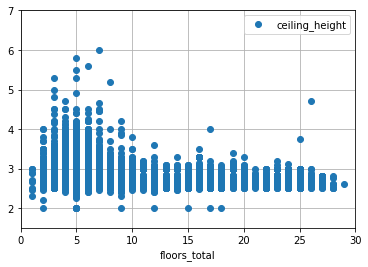

In [11]:
df.plot(x='floors_total', y='ceiling_height', ylim=(1.5, 7), xlim=(0, 30), style='o', grid=True)
plt.show()

Видим явную зависимость. Это вполне логично, в многоэтажных зданиях высота потолков явно ниже, чем в зданиях этажности меньше.
Для заполнения пропусков в высоте потолков нам нужно сначала заполнить пропуски в этажности.

<b>floors_total:</b> 

In [12]:
print('Пропусков в столбце floors_total:', df['floors_total'].isnull().sum())

Пропусков в столбце floors_total: 86


Заменим пропущенные данные на медианные в зависимости от населенного пункта. Посмотрим что у нас с уникальными значениями в столбце с населенными пунктами.

In [13]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Нужно избавиться от неявных дубликатов.

In [14]:
df['locality_name'].value_counts()

Санкт-Петербург                       15721
посёлок Мурино                          522
посёлок Шушары                          440
Всеволожск                              398
Пушкин                                  369
                                      ...  
деревня Котлы                             1
деревня Вахнова Кара                      1
село Шум                                  1
коттеджный поселок Кивеннапа Север        1
деревня Новолисино                        1
Name: locality_name, Length: 364, dtype: int64

In [15]:
df['locality_name'].nunique()

364

Избавимся от дублей путем замены вида населенного пункта. Предположим, что некоторые населенные пункты могут быть указаны с разными видами, поэтому избавимся от них.

In [16]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('городского типа', '')
df['locality_name'] = df['locality_name'].str.replace('городской', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный', '')
df['locality_name'] = df['locality_name'].str.replace(' поселок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace(' при железнодорожной станции', '')
df['locality_name'] = df['locality_name'].str.replace(' станции', '')
df['locality_name'] = df['locality_name'].str.replace('  ', ' ')
df['locality_name'] = df['locality_name'].str.replace('поселок ', '')
df['locality_name'] = df['locality_name'].str.replace('деревня ', '')
df['locality_name'] = df['locality_name'].str.replace('село ', '')
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество ', '')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')

In [17]:
df['locality_name'].nunique()

305

In [18]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Уникальных значений стало явно меньше. Теперь заполним пропуски в этом же столбце.

<b>locality_name</b> 

In [19]:
print('Пропусков в столбце locality_name:', df['locality_name'].isnull().sum())

Пропусков в столбце locality_name: 49


In [20]:
df.loc[(df['locality_name'].isnull()) & (df['cityCenters_nearest'] < 16000), 'locality_name'] = \
df.loc[(df['locality_name'].isnull()) & (df['cityCenters_nearest'] < 16000), 'locality_name'].fillna('Санкт-Петербург')

In [21]:
print('Пропусков в столбце locality_name:', df['locality_name'].isnull().sum())

Пропусков в столбце locality_name: 21


Больше мы вряд ли что-то узнаем, оставим как есть.

Вернемся к floors_total и заполним пропуски.

In [22]:
for city in df['locality_name'].unique():
    df.loc[(df['floors_total' ].isna()) & (df['locality_name'] == city), 'floors_total' ] = \
    df.loc[df['locality_name'] == city, 'floors_total'].median() 

In [23]:
print('Пропусков в столбце floors_total:', df['floors_total'].isnull().sum())

Пропусков в столбце floors_total: 1


In [24]:
df[(df['floors_total'].isnull())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8986,10,4850000.000,103.100,2018-07-10T00:00:00,3,NaN,NaN,68.100,4,NaN,False,False,16.700,NaN,NaN,19659.000,31813.000,0.000,NaN,0.000,NaN,28.000


Оставшийся пропуск заполним просто медианным значением.

In [25]:
df.loc[(df['floors_total'].isna()), 'floors_total'] = df['floors_total'].median()

In [26]:
print('Пропусков в столбце floors_total:', df['floors_total'].isnull().sum())

Пропусков в столбце floors_total: 0


Пропуски заполнили. Вернемся к высоте потолков.

<b>ceiling_height:</b> 

Заполним высоту потолков медианами по этажности зданий.

In [27]:
try:
    for floor in df['floors_total'].unique():
        df.loc[(df['ceiling_height'].isna()) & (df['floors_total'] == floor),'ceiling_height'] = \
        df.loc[df['floors_total'] == floor, 'ceiling_height'].median()
except:
    pass

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [28]:
print('Пропусков в столбце ceiling_height:', df['ceiling_height'].isnull().sum())

Пропусков в столбце ceiling_height: 1


In [29]:
df[(df['ceiling_height'].isnull())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11575,9,9900000.000,101.000,2016-04-28T00:00:00,3,NaN,33.000,53.000,32,False,False,False,21.000,0.000,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,53.000


Заполним оставшийся пропуск медианными значеними.

In [30]:
df.loc[(df['ceiling_height'].isna()), 'ceiling_height'] = df['ceiling_height'].median()

In [31]:
print('Пропусков в столбце ceiling_height:', df['ceiling_height'].isnull().sum())

Пропусков в столбце ceiling_height: 0


<b>balcony:</b> 

In [32]:
print('Пропусков в столбце balcony:', df['balcony'].isnull().sum())

Пропусков в столбце balcony: 11519


In [33]:
df['balcony'] = df['balcony'].fillna(0)

In [34]:
print('Пропусков в столбце balcony:', df['balcony'].isnull().sum())

Пропусков в столбце balcony: 0


<b>is_apartment</b> 

In [35]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [36]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [37]:
print('Пропусков в столбце is_apartment:', df['is_apartment'].isnull().sum())

Пропусков в столбце is_apartment: 0


<b>living_area и kitchen_area</b> 

Проверим, действительно ли есть зависимость жилой и площади кухни от общей площади

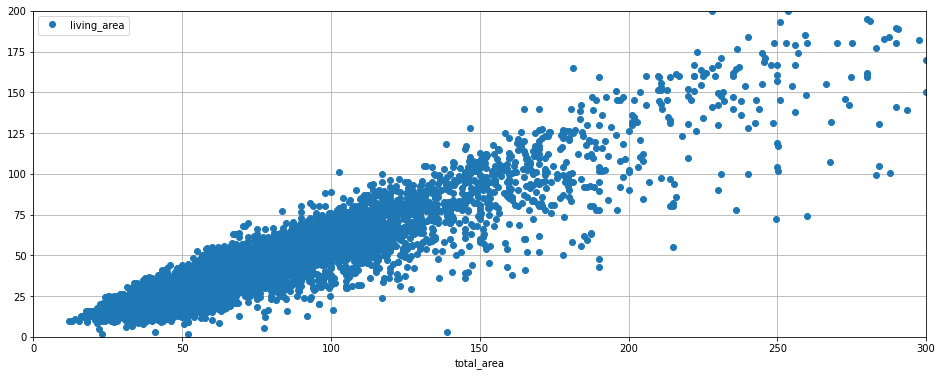

In [38]:
df.plot(x='total_area', y='living_area', ylim=(0, 200), xlim=(0, 300), style='o', grid=True,  figsize=(16, 6))
plt.show()

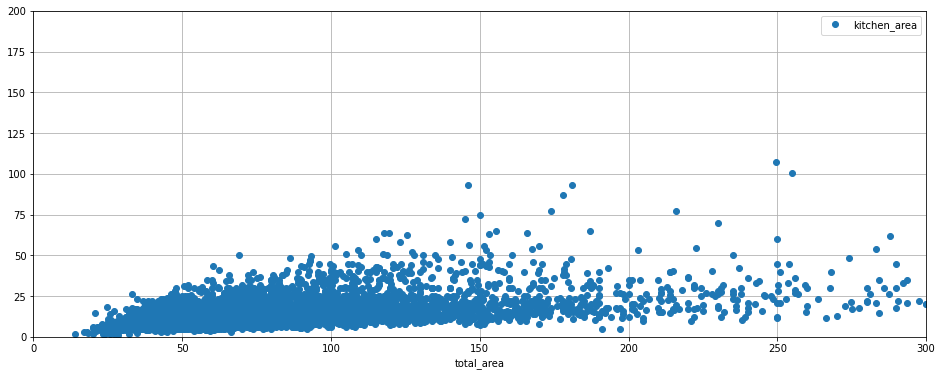

In [39]:
df.plot(x='total_area', y='kitchen_area', ylim=(0, 200), xlim=(0, 300), style='o', grid=True,  figsize=(16, 6))
plt.show()

Взаимосвязь четко прослеживается, но чем больше общая площадь, тем больше разброс в данных.

In [40]:
df['living_area'].isna().sum()

1903

In [41]:
df['kitchen_area'].isna().sum()

2278

Категоризируем общие площади квартир.

In [42]:
def categorize_area(area):
    if 0 <= area <= 50:
        return 'до 50 м'
    elif 50 < area <= 100:
        return 'от 50 до 100 м'
    elif 100 < area <= 150:
        return 'от 100 до 150 м'
    elif 150 < area <= 200:
        return 'от 150 до 200 м'
    elif area > 200:
        return 'более 200'

In [43]:
df['total_area_category'] = df['total_area'].apply(categorize_area)

И заполним пропущенные значения медианами по категориям.

In [44]:
for category in df['total_area_category'].unique():
    df.loc[(df['living_area'].isna()) & (df['total_area_category'] == category),'living_area'] = \
    df.loc[df['total_area_category'] == category, 'living_area'].median()
    df.loc[(df['kitchen_area'].isna()) & (df['total_area_category'] == category),'kitchen_area'] = \
    df.loc[df['total_area_category'] == category, 'kitchen_area'].median()    

In [45]:
df['living_area'].isna().sum()

0

In [46]:
df['kitchen_area'].isna().sum()

0

<b>airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest</b> 

Так как данные столбцы заполняла система, то скорее всего пропуски в расстоянии до ближайшего аэропорта, парка, пруда обусловлены тем, что дальше определенного расстояния система посчитать не смогла и проставила пропуск. Оставим эти данные и не будем их трогать.
А вот пропуски в числе прудов и парков - это их отсутствие, проставим 0.

In [47]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [48]:
display(df.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              21
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
total_area_category         0
dtype: int64

Итого у нас остались незаполненными:

locality_name - заполнили на сколько это было возможно

cityCenters_nearest, airports_nearest, parks_nearest - будем считать, что они очень далеко.

days_exposition - заполнить не из чего

#### Типы данных

In [49]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,False,False,False,25.000,0.000,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN,от 100 до 150 м
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,2.750,11.000,18.600,1,False,False,False,11.000,2.000,Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000,до 50 м
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,2.550,5.000,34.300,4,False,False,False,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000,от 50 до 100 м
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,2.600,14.000,99.100,9,False,False,False,19.500,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000,от 150 до 200 м
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,False,False,False,41.000,0.000,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000,от 50 до 100 м
5,10,2890000.000,30.400,2018-09-10T00:00:00,1,2.650,12.000,14.400,5,False,False,False,9.100,0.000,Янино-1,NaN,NaN,0.000,NaN,0.000,NaN,55.000,до 50 м
6,6,3700000.000,37.300,2017-11-02T00:00:00,1,2.660,26.000,10.600,6,False,False,False,14.400,1.000,Парголово,52996.000,19143.000,0.000,NaN,0.000,NaN,155.000,до 50 м
7,5,7915000.000,71.600,2019-04-18T00:00:00,2,2.750,24.000,39.600,22,False,False,False,18.900,2.000,Санкт-Петербург,23982.000,11634.000,0.000,NaN,0.000,NaN,NaN,от 50 до 100 м
8,20,2900000.000,33.160,2018-05-23T00:00:00,1,2.700,27.000,15.430,26,False,False,False,8.810,0.000,Мурино,NaN,NaN,0.000,NaN,0.000,NaN,189.000,до 50 м
9,18,5400000.000,61.000,2017-02-26T00:00:00,3,2.500,9.000,43.600,7,False,False,False,6.500,2.000,Санкт-Петербург,50898.000,15008.000,0.000,NaN,0.000,NaN,289.000,от 50 до 100 м


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23678 non-null  object 
 15  airports_nearest   

Столбцы, которые необходимо привести к int:
last_price, balcony, floors_total, parks_around3000, ponds_around3000, days_exposition

В данных столбцах явно должны быть целые числа.

In [51]:
list_to_int = ['last_price', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']

In [52]:
for column in list_to_int:
    df[column] = df[df[column].notnull()][column].astype('int')

first_day_exposition приведем к data

In [53]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [54]:
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,False,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1,482.000,2,755.000,NaN,от 100 до 150 м
1,7,3350000,40.400,2018-12-04,1,2.750,11,18.600,1,False,False,False,11.000,2,Шушары,12817.000,18603.000,0,NaN,0,NaN,81.000,до 50 м
2,10,5196000,56.000,2015-08-20,2,2.550,5,34.300,4,False,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1,90.000,2,574.000,558.000,от 50 до 100 м
3,0,64900000,159.000,2015-07-24,3,2.600,14,99.100,9,False,False,False,19.500,0,Санкт-Петербург,28098.000,6800.000,2,84.000,3,234.000,424.000,от 150 до 200 м
4,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,False,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2,112.000,1,48.000,121.000,от 50 до 100 м
5,10,2890000,30.400,2018-09-10,1,2.650,12,14.400,5,False,False,False,9.100,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.000,до 50 м
6,6,3700000,37.300,2017-11-02,1,2.660,26,10.600,6,False,False,False,14.400,1,Парголово,52996.000,19143.000,0,NaN,0,NaN,155.000,до 50 м
7,5,7915000,71.600,2019-04-18,2,2.750,24,39.600,22,False,False,False,18.900,2,Санкт-Петербург,23982.000,11634.000,0,NaN,0,NaN,NaN,от 50 до 100 м
8,20,2900000,33.160,2018-05-23,1,2.700,27,15.430,26,False,False,False,8.810,0,Мурино,NaN,NaN,0,NaN,0,NaN,189.000,до 50 м
9,18,5400000,61.000,2017-02-26,3,2.500,9,43.600,7,False,False,False,6.500,2,Санкт-Петербург,50898.000,15008.000,0,NaN,0,NaN,289.000,от 50 до 100 м


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### Аномалии

В самом начале проекта мы обратили внимание на аномальные данные в следующих столбцах - цена, общая площадь, число комнат, высота потолков.


In [56]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000,23699.000,23699.000,23699.000
mean,60.349,6541548.772,2.071,2.735
std,35.654,10887013.268,1.078,0.994
min,12.000,12190.000,0.000,1.000
25%,40.000,3400000.000,1.000,2.550
50%,52.000,4650000.000,2.000,2.650
75%,69.900,6800000.000,3.000,2.750
max,900.000,763000000.000,19.000,100.000


Видим, что:

Площадь - минимальное значение 12 - слишком маленькая для квартиры, как и 900 - слишком большое.

Цена - 12190 выглядит неправдоподобно низкой, а вот 763 млн - почему бы и нет? может там сантехника золотая?

Количество комнат - 0 возможно у квартир-студий, а вот 19 - это уже не очень похожу на правду.

Высота потолков - один метр явно маловато, как и 100-метровые потолки - многовато.

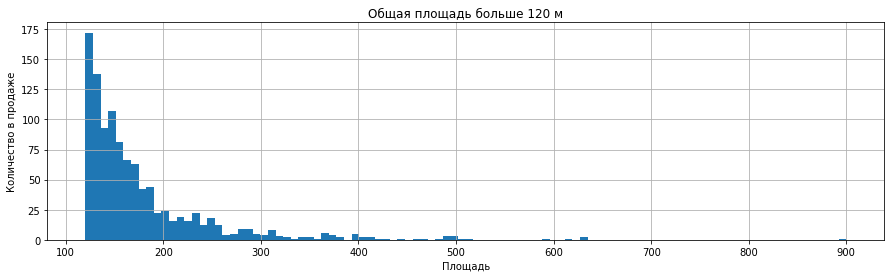

In [57]:
df.query('total_area > 120')['total_area'].hist(bins=100, figsize=(15, 4))
plt.title('Общая площадь больше 120 м')
plt.xlabel('Площадь')
plt.ylabel('Количество в продаже')
plt.show()

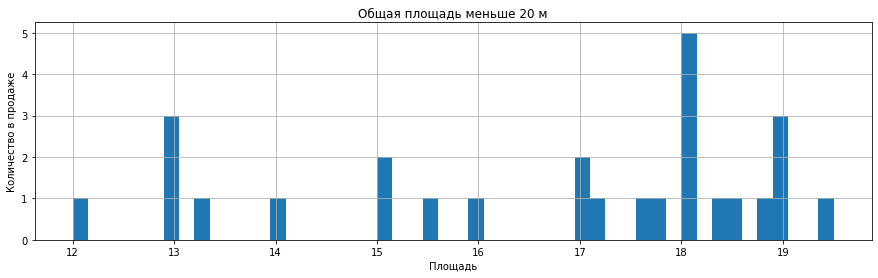

In [58]:
df.query('total_area < 20')['total_area'].hist(bins=50, figsize=(15, 4))
plt.title('Общая площадь меньше 20 м')
plt.xlabel('Площадь')
plt.ylabel('Количество в продаже')
plt.show()

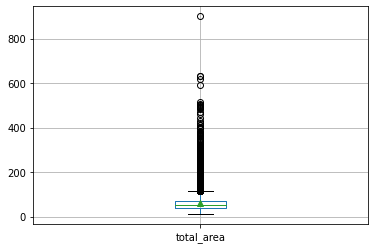

In [59]:
df.boxplot('total_area', showmeans=True, grid=True)
plt.show()

На графике видно, что за пределами 120 кв.м много выбросов. Однако на графике с количеством квартир более 120 квадратов, явно видно, что квартир больше 200 метров не так уж и много. Посчитаем сколько их от общего числа квартир.

In [60]:
display(((df['total_area'] > 200).sum())/(df['total_area'].count().sum()))

0.009578463226296468

In [61]:
display((df['total_area'] > 200).sum())

227

Выборка слишком мала, менее 1%, можно от нее избавиться.

In [62]:
df = df[df['total_area'] < 200]
display((df['total_area'] > 200).sum())

0

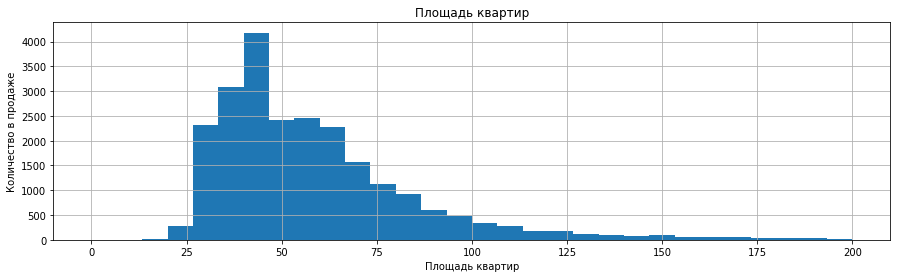

In [63]:
df['total_area'].hist(bins=30, range = (0, 200), figsize=(15, 4))
plt.title('Площадь квартир')
plt.xlabel('Площадь квартир')
plt.ylabel('Количество в продаже')
plt.show()

Квартиры с площадью менее 20 метров оставим, они не на что не влияют, в конце концов, в Москве есть квартиры и 8 квадратов :)

Посмотрим что с ценами.

In [64]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23468.000,23468.000,23468.000,23468.000
mean,58.156,6022580.079,2.034,2.731
std,26.469,6226898.569,0.995,0.997
min,12.000,12190.000,0.000,1.000
25%,40.000,3400000.000,1.000,2.550
50%,51.900,4600000.000,2.000,2.650
75%,68.900,6700000.000,3.000,2.750
max,199.200,330000000.000,11.000,100.000


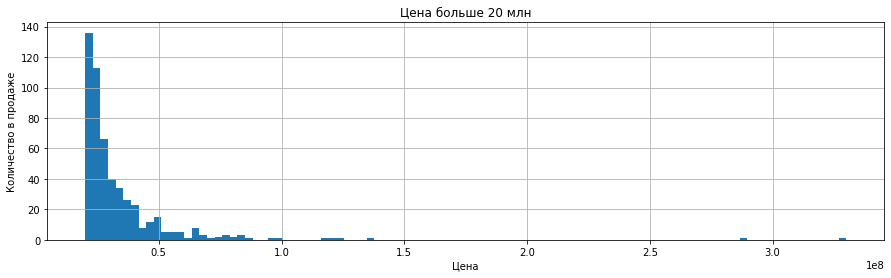

In [65]:
df.query('last_price > 20000000')['last_price'].hist(bins=100, figsize=(15, 4))
plt.title('Цена больше 20 млн')
plt.xlabel('Цена')
plt.ylabel('Количество в продаже')
plt.show()

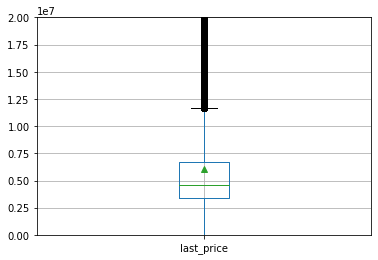

In [66]:
df.boxplot('last_price', showmeans=True, grid=True)
plt.ylim(0, 20000000)
plt.show()

Посчитаем верхнюю границу усов у ящика с усами, так как на графике это не очень наглядно.

In [67]:
q1 = df['last_price'].quantile(0.25)
q3 = df['last_price'].quantile(0.75)
iqr = q3 - q1
whisker_up = q3 + 1.5 * iqr
print('Верхний ус = ', whisker_up)

Верхний ус =  11650000.0


И посмотрим сколько у нас строк за пределами этого уса.

In [68]:
display(((df['last_price'] > whisker_up).sum())/(df['last_price'].count().sum()))

0.08023691835691153

8% - многовато, увеличим межквартильный размах

In [69]:
q1 = df['last_price'].quantile(0.05)
q3 = df['last_price'].quantile(0.95)
iqr = q3 - q1
whisker_up = q3 + 1.5 * iqr
print('Верхний ус = ', whisker_up)

Верхний ус =  32225000.0


In [70]:
display(((df['last_price'] > whisker_up).sum())/(df['last_price'].count().sum()))

0.007116072950400546

In [71]:
df = df[df['last_price'] <= whisker_up]
display((df['last_price'] > whisker_up).sum())

0

Посмотрим что у нас с маленькими значениями

In [72]:
df.sort_values('last_price').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
8793,7,12190,109.000,2019-03-20,2,2.750,25,32.000,25,False,False,False,40.500,0,Санкт-Петербург,36421.000,9176.000,1,805.000,0,NaN,8.000,от 100 до 150 м
14911,5,430000,54.000,2018-06-26,2,2.800,3,39.600,3,False,False,False,10.000,0,Свирь,NaN,NaN,0,NaN,0,NaN,44.000,от 50 до 100 м
17456,7,430000,30.400,2019-04-22,1,2.700,2,16.000,1,False,False,False,6.000,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN,до 50 м
16274,18,440000,40.000,2018-07-10,1,2.550,5,18.400,1,False,False,False,8.000,0,Старополье,NaN,NaN,0,NaN,0,NaN,45.000,до 50 м
16219,14,450000,38.500,2018-07-11,2,2.650,2,18.400,1,False,False,False,8.000,0,Вахнова Кара,NaN,NaN,0,NaN,0,NaN,45.000,до 50 м


Удалим строку с ценой 12190

In [73]:
df = df[df['last_price'] > 12190]

In [74]:
df['last_price'].describe()

count      23300.000
mean     5695098.299
std      3960110.049
min       430000.000
25%      3400000.000
50%      4600000.000
75%      6600000.000
max     32100000.000
Name: last_price, dtype: float64

Так больше похоже на правду.

Смотрим что с количеством комнат

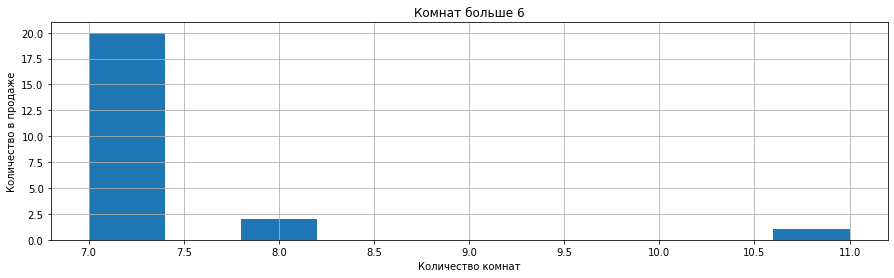

In [75]:
df.query('rooms > 6')['rooms'].hist(bins=10, figsize=(15, 4))
plt.title('Комнат больше 6')
plt.xlabel('Количество комнат')
plt.ylabel('Количество в продаже')
plt.show()

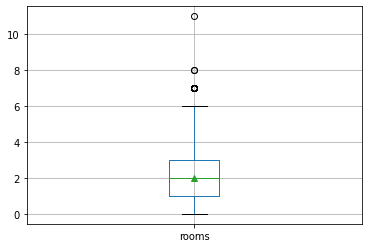

In [76]:
df.boxplot('rooms', showmeans=True, grid=True)
plt.show()

In [77]:
df['rooms'].describe()

count   23300.000
mean        2.025
std         0.988
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        11.000
Name: rooms, dtype: float64

Проверим, действительно ли 0 в квартирах-студиях.

In [78]:
df.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
144,1,2450000,27.000,2017-03-30,0,2.750,24,15.500,2,False,True,False,8.000,2,Мурино,NaN,NaN,0,NaN,0,NaN,181.000,до 50 м
349,4,2320000,25.000,2017-09-27,0,2.600,14,17.000,1,False,False,True,8.000,0,Кудрово,NaN,NaN,0,NaN,0,NaN,45.000,до 50 м
440,8,2480000,27.110,2018-03-12,0,2.700,17,24.750,4,False,True,False,8.000,2,Санкт-Петербург,38171.000,15015.000,0,NaN,2,982.000,64.000,до 50 м
508,0,3375000,34.400,2017-03-28,0,2.660,26,24.300,19,False,False,True,8.000,1,Парголово,53115.000,19292.000,0,NaN,1,593.000,430.000,до 50 м
608,2,1850000,25.000,2019-02-20,0,2.600,10,18.400,7,False,True,False,8.000,0,Шушары,NaN,NaN,0,NaN,0,NaN,29.000,до 50 м
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.000,2017-09-01,0,2.750,25,18.000,16,False,True,False,8.000,0,Санкт-Петербург,11405.000,13222.000,0,NaN,1,623.000,14.000,до 50 м
23442,0,2500000,27.700,2017-09-28,0,2.750,24,18.000,4,False,False,True,8.000,2,Мурино,NaN,NaN,0,NaN,0,NaN,4.000,до 50 м
23554,15,3350000,26.000,2018-09-07,0,2.750,19,18.400,8,False,True,False,8.000,0,Санкт-Петербург,18090.000,17092.000,0,NaN,2,112.000,31.000,до 50 м
23592,10,1450000,29.000,2017-11-11,0,2.550,9,18.000,8,False,False,True,8.000,2,Никольское,NaN,NaN,0,NaN,0,NaN,82.000,до 50 м


Нет, есть и студии и не очень студии. Но возможно студии вносят как однокомнатные квартиры,судя по квадратуре. Необходимо проверить как вносятся эти данные на сайте и подсветить это тем, кто отвечает за сайт. 

Проставим всем нулям единички, а также удалим все строки с комнатами более 6.

In [79]:
df.loc[df['rooms'] == 0, 'rooms'] = 1
display((df['rooms'] == 0).sum())

0

In [80]:
df = df[df['rooms'] <= 6]

In [81]:
df['rooms'].describe()

count   23277.000
mean        2.028
std         0.961
min         1.000
25%         1.000
50%         2.000
75%         3.000
max         6.000
Name: rooms, dtype: float64

Красивое, едем дальше - высота потолков.

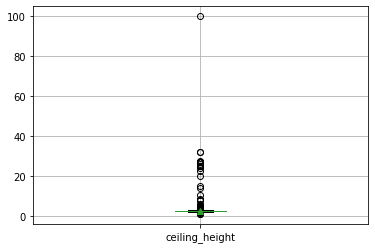

In [82]:
df.boxplot('ceiling_height', showmeans=True)
plt.show()

In [83]:
df['ceiling_height'].describe()

count   23277.000
mean        2.728
std         1.000
min         1.000
25%         2.550
50%         2.650
75%         2.750
max       100.000
Name: ceiling_height, dtype: float64

Посмотрим что у нас с высокими показателями.

In [84]:
df[df['ceiling_height'] > 4].sort_values('ceiling_height').tail(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
11285,0,1950000,37.000,2019-03-20,1,25.000,5,17.000,4,False,False,False,9.000,2,Луга,NaN,NaN,0,NaN,0,NaN,18.000,до 50 м
9379,5,3950000,42.000,2017-03-26,3,25.000,5,30.000,2,False,False,False,5.200,0,Санкт-Петербург,11647.000,13581.000,0,NaN,0,NaN,NaN,до 50 м
5669,4,4400000,50.000,2017-08-08,2,26.000,9,21.300,3,False,False,False,7.000,2,Санкт-Петербург,28981.000,10912.000,1,305.000,0,NaN,267.000,до 50 м
21824,20,2450000,44.000,2019-02-12,2,27.000,2,38.000,2,False,False,False,8.600,2,Большая Ижора,NaN,NaN,0,NaN,0,NaN,NaN,до 50 м
10773,8,3800000,58.000,2017-10-13,2,27.000,10,30.100,3,False,False,False,8.100,2,Мурино,NaN,NaN,0,NaN,0,NaN,71.000,от 50 до 100 м
17857,1,3900000,56.000,2017-12-22,3,27.000,5,33.000,4,False,False,False,10.000,0,Санкт-Петербург,41030.000,15543.000,0,NaN,0,NaN,73.000,от 50 до 100 м
5807,17,8150000,80.000,2019-01-09,2,27.000,36,41.000,13,False,False,False,12.000,5,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,38.000,от 50 до 100 м
5246,0,2500000,54.000,2017-10-13,2,27.000,5,30.000,3,False,False,False,9.000,2,Мины,NaN,NaN,0,NaN,0,NaN,540.000,от 50 до 100 м
4876,7,3000000,25.000,2017-09-27,1,27.000,25,17.000,17,False,False,True,8.000,2,Мурино,NaN,NaN,0,NaN,0,NaN,28.000,до 50 м
20478,11,8000000,45.000,2017-07-18,1,27.000,4,22.000,2,False,False,False,10.000,1,Санкт-Петербург,18975.000,3246.000,0,NaN,3,449.000,429.000,до 50 м


Очень похоже на то, что некоторые значения были внесены неверно. Вместо 2,5 метров внесено 25. Исправим это.

In [85]:
def fix_height(val):
    if val >= 20:
        return val / 10
    return val

In [86]:
df['ceiling_height'] = df['ceiling_height'].apply(fix_height)

In [87]:
df['ceiling_height'].describe()

count   23277.000
mean        2.702
std         0.265
min         1.000
25%         2.550
50%         2.650
75%         2.750
max        14.850
Name: ceiling_height, dtype: float64

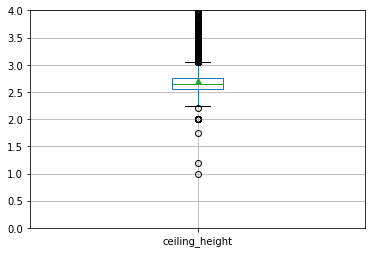

In [88]:
df.boxplot('ceiling_height', showmeans=True)
plt.ylim(0, 4)
plt.show()

Удаляем оставшиеся выбросы.

In [89]:
display(((df['ceiling_height'] < 2).sum())/(df['ceiling_height'].count().sum()))

0.0001288825879623663

In [90]:
display(((df['ceiling_height'] > 3.75).sum())/(df['ceiling_height'].count().sum()))

0.004854577479915797

In [91]:
df = df[df['ceiling_height'] > 2]
df = df[df['ceiling_height'] < 3.75]

In [92]:
df['ceiling_height'].describe()

count   23142.000
mean        2.694
std         0.198
min         2.200
25%         2.550
50%         2.650
75%         2.750
max         3.700
Name: ceiling_height, dtype: float64

Так гораздо лучше. Смотрим этажность зданий.

In [93]:
df['floors_total'].describe()

count   23142.000
mean       10.759
std         6.608
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        60.000
Name: floors_total, dtype: float64

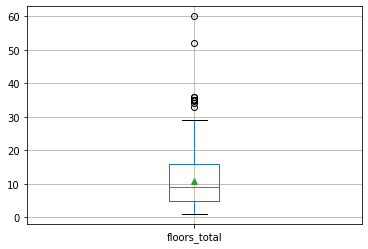

In [94]:
df.boxplot('floors_total', showmeans=True)
plt.show()

Максимальная этажность - 60, многовато, как мне кажется. Посмотрим строки с высокой этажностью.

In [95]:
df[df['floors_total'] > 30].sort_values('floors_total', ascending=False).head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
2253,12,3800000,45.500,2018-06-28,2,2.880,60,27.400,4,False,False,False,7.400,0,Кронштадт,67763.000,49488.000,2,342.000,3,614.000,166.000,до 50 м
16731,9,3978000,40.000,2018-09-24,1,2.650,52,10.500,18,False,False,False,14.000,0,Санкт-Петербург,20728.000,12978.000,1,793.000,0,NaN,45.000,до 50 м
11079,16,9200000,75.000,2019-02-22,2,2.700,36,40.000,29,False,False,False,12.000,2,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,NaN,от 50 до 100 м
5807,17,8150000,80.000,2019-01-09,2,2.700,36,41.000,13,False,False,False,12.000,5,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,38.000,от 50 до 100 м
12888,7,7600000,70.000,2016-11-18,3,2.700,35,36.500,27,False,False,False,23.100,2,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,413.000,от 50 до 100 м
21809,20,10600000,77.000,2019-04-16,2,2.700,35,39.000,11,False,False,False,14.000,2,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,NaN,от 50 до 100 м
21599,12,6200000,51.000,2017-08-27,2,2.700,35,27.000,13,False,False,False,19.000,0,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,NaN,от 50 до 100 м
20938,18,9900000,100.900,2019-04-08,3,2.700,35,53.400,22,False,False,False,13.400,0,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,NaN,от 100 до 150 м
18629,20,5700000,54.000,2017-12-08,1,2.700,35,21.000,31,False,False,False,18.000,0,Санкт-Петербург,18732.000,20444.000,0,NaN,3,80.000,128.000,от 50 до 100 м
18617,8,7350000,68.500,2017-10-09,2,2.700,35,27.000,3,False,False,False,23.000,1,Санкт-Петербург,18627.000,20339.000,1,609.000,3,145.000,41.000,от 50 до 100 м


60-этажное здание в Кронштадте? Маловероятно. Удалим все, что выше 30 этажей.

In [96]:
df = df[df['floors_total'] <= 30]

In [97]:
df['floors_total'].describe()

count   23112.000
mean       10.725
std         6.545
min         1.000
25%         5.000
50%         9.000
75%        16.000
max        29.000
Name: floors_total, dtype: float64

#### Дубликаты

От неявных дубликатов мы избавились ранее при обработке пропусков. Проверим что у нас с явными дубликатами.

In [98]:
df.duplicated().sum()

0

Явных дубликатов нет.

Мы проделали большую работу по предобработке данных:
- заполнили пропуски там где это было возможно. Остались незаполненными locality_name - заполнили на сколько это было возможно, cityCenters_nearest, airports_nearest, parks_nearest - будем считать, что они очень далеко, либо система как-то неправильно считает расстояние, надо бы отправить в поддержку информацию об этом, days_exposition - заполнить не из чего, также надо бы направить баг-репорт.
- Изменили типы данных, чтобы с ними стало удобней работать.
- Выявили аномали и постарались от них избавиться на сколько это возможно, чтобы реальность данных сохранилась.
- Выявили и устранили неявные дубликаты в названии населенных пунктов и убедились в том, что явных дубликатов нет.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим новые столбцы. 

#### Цена одного квадратного метра:

In [99]:
df['price_square_meter'] = (df['last_price']/df['total_area']).astype(int)

In [100]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,price_square_meter
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,False,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1,482.000,2,755.000,NaN,от 100 до 150 м,120370
1,7,3350000,40.400,2018-12-04,1,2.750,11,18.600,1,False,False,False,11.000,2,Шушары,12817.000,18603.000,0,NaN,0,NaN,81.000,до 50 м,82920
2,10,5196000,56.000,2015-08-20,2,2.550,5,34.300,4,False,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1,90.000,2,574.000,558.000,от 50 до 100 м,92785
4,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,False,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2,112.000,1,48.000,121.000,от 50 до 100 м,100000
5,10,2890000,30.400,2018-09-10,1,2.650,12,14.400,5,False,False,False,9.100,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.000,до 50 м,95065


#### День недели, месяц и год публикации объявления:

In [101]:
df['day_exposition'] = df['first_day_exposition'].dt.weekday

In [102]:
df['month_exposition'] = df['first_day_exposition'].dt.month

In [103]:
df['year_exposition'] = df['first_day_exposition'].dt.year

In [104]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,price_square_meter,day_exposition,month_exposition,year_exposition
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,False,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1,482.000,2,755.000,NaN,от 100 до 150 м,120370,3,3,2019
1,7,3350000,40.400,2018-12-04,1,2.750,11,18.600,1,False,False,False,11.000,2,Шушары,12817.000,18603.000,0,NaN,0,NaN,81.000,до 50 м,82920,1,12,2018
2,10,5196000,56.000,2015-08-20,2,2.550,5,34.300,4,False,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1,90.000,2,574.000,558.000,от 50 до 100 м,92785,3,8,2015
4,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,False,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2,112.000,1,48.000,121.000,от 50 до 100 м,100000,1,6,2018
5,10,2890000,30.400,2018-09-10,1,2.650,12,14.400,5,False,False,False,9.100,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.000,до 50 м,95065,0,9,2018


#### Тип этажа квартиры (значения — «‎первый», «последний», «другой»):

In [105]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return'последний'
    else:
        return 'другой'

In [106]:
df['floor_category'] = df.apply(floor_category, axis = 1)

In [107]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,price_square_meter,day_exposition,month_exposition,year_exposition,floor_category
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,False,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1,482.000,2,755.000,NaN,от 100 до 150 м,120370,3,3,2019,другой
1,7,3350000,40.400,2018-12-04,1,2.750,11,18.600,1,False,False,False,11.000,2,Шушары,12817.000,18603.000,0,NaN,0,NaN,81.000,до 50 м,82920,1,12,2018,первый
2,10,5196000,56.000,2015-08-20,2,2.550,5,34.300,4,False,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1,90.000,2,574.000,558.000,от 50 до 100 м,92785,3,8,2015,другой
4,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,False,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2,112.000,1,48.000,121.000,от 50 до 100 м,100000,1,6,2018,другой
5,10,2890000,30.400,2018-09-10,1,2.650,12,14.400,5,False,False,False,9.100,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.000,до 50 м,95065,0,9,2018,другой


#### Расстояние до центра города в километрах:

Переведем из м в км и округлим до целых значений

In [108]:
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).round(0)

In [109]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,price_square_meter,day_exposition,month_exposition,year_exposition,floor_category,cityCenters_nearest_km
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,False,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1,482.000,2,755.000,NaN,от 100 до 150 м,120370,3,3,2019,другой,16.000
1,7,3350000,40.400,2018-12-04,1,2.750,11,18.600,1,False,False,False,11.000,2,Шушары,12817.000,18603.000,0,NaN,0,NaN,81.000,до 50 м,82920,1,12,2018,первый,19.000
2,10,5196000,56.000,2015-08-20,2,2.550,5,34.300,4,False,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1,90.000,2,574.000,558.000,от 50 до 100 м,92785,3,8,2015,другой,14.000
4,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,False,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2,112.000,1,48.000,121.000,от 50 до 100 м,100000,1,6,2018,другой,8.000
5,10,2890000,30.400,2018-09-10,1,2.650,12,14.400,5,False,False,False,9.100,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.000,до 50 м,95065,0,9,2018,другой,NaN


### Проведите исследовательский анализ данных

#### Общие наблюдения

Построим гистограммы к интересующим нас параметрам.

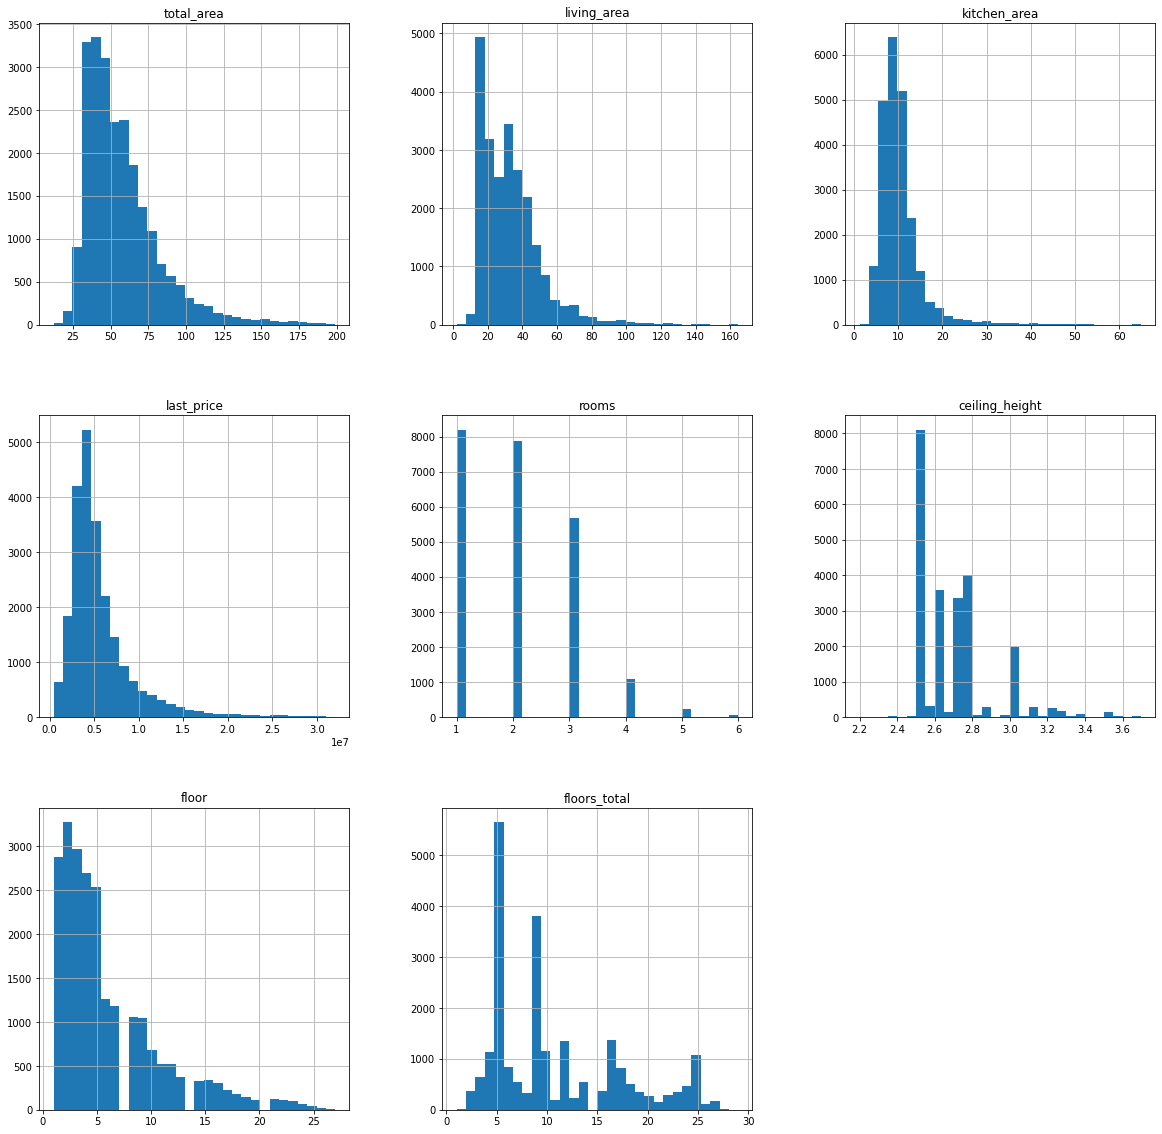

In [110]:
features = ['total_area', 'living_area', 'kitchen_area',  'last_price', 
            'rooms',   'ceiling_height',   'floor', 'floor_category', 
            'floors_total']

df[features].hist(bins=30, figsize=(20,20))
plt.show()

In [111]:
floor_category_stat = df.groupby('floor_category')['floor_category'].count()

In [112]:
floor_category_stat.columns = ['floor_category', 'count']

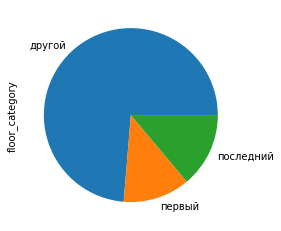

In [113]:
floor_category_stat.plot(x='floor_category', y='count', kind='pie')
plt.show()

Больше всего в продаже однушек и двушек на 1-5 этаже в пяти- и девятиэтажках. Первый и последний этажи присутствуют примерно в 25% объявлений. Больше всего квартир с общей площадью от 30 до 50 квадратов и потолками 2,5 м. Жилой площади больше всего около 15 метров, а кухни - 8-9 метров. Больше всего квартир по цене до 500 000 руб, что наталкивает на мысль о том, что большая часть квартир продается не в самом Санкт-Петербурге, а в области.

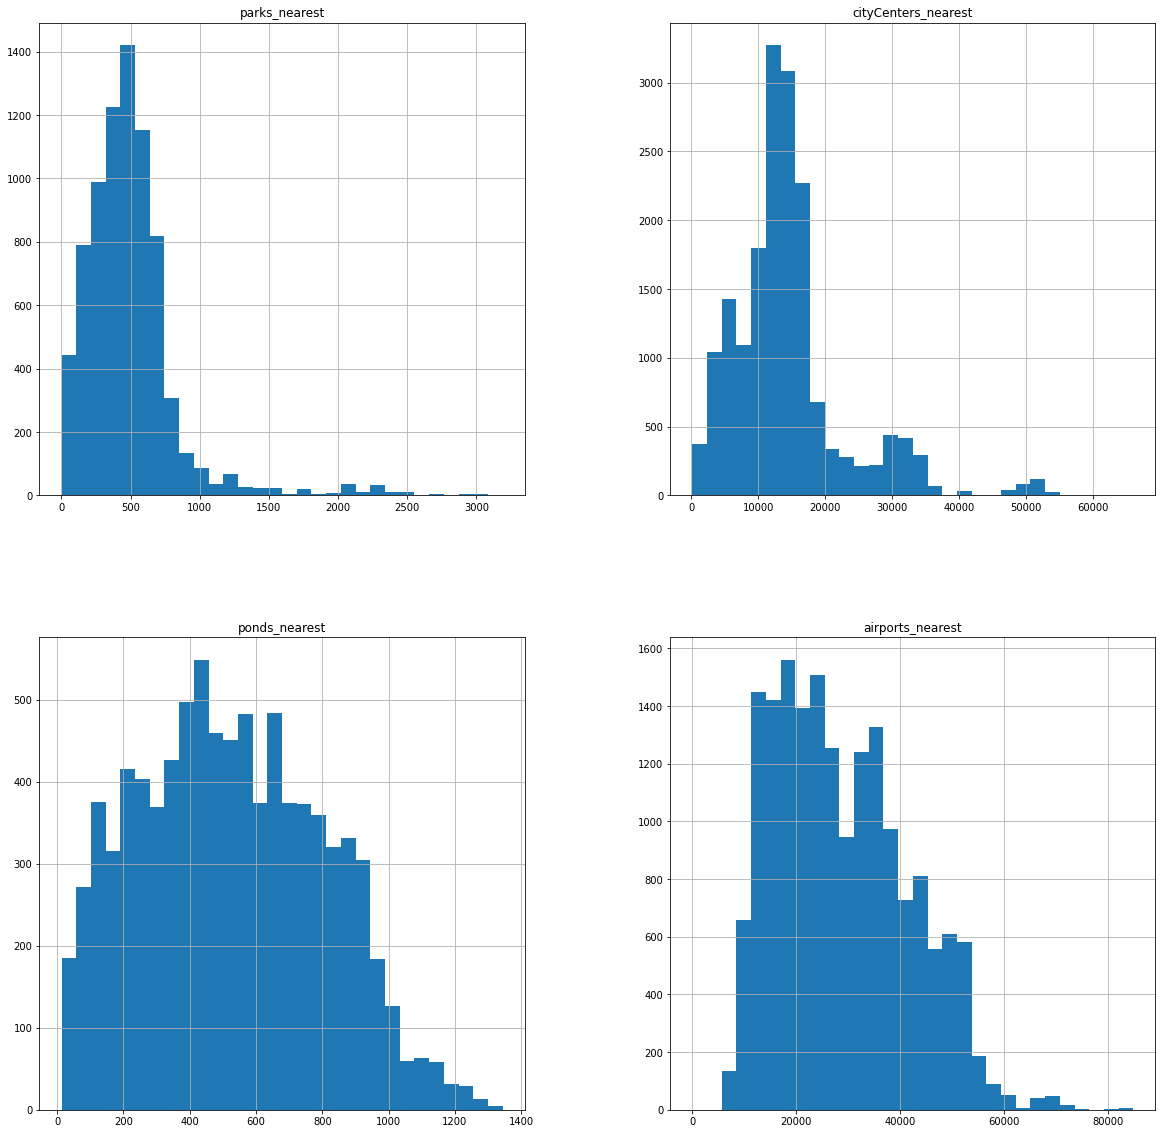

In [114]:
features1 = list(set(['cityCenters_nearest','airports_nearest', 'parks_nearest', 'ponds_nearest']))

df[features1].hist(bins=30, figsize=(20,20))
plt.show()

Чаще всего продают квартиры в 500 метрах от парков и прудов в 12-15 км от центра и 18-30 км от аэропорта. Что опять же наводит на мысли о том, что большая часть квартир продается в области, где-то в районе Мурино.

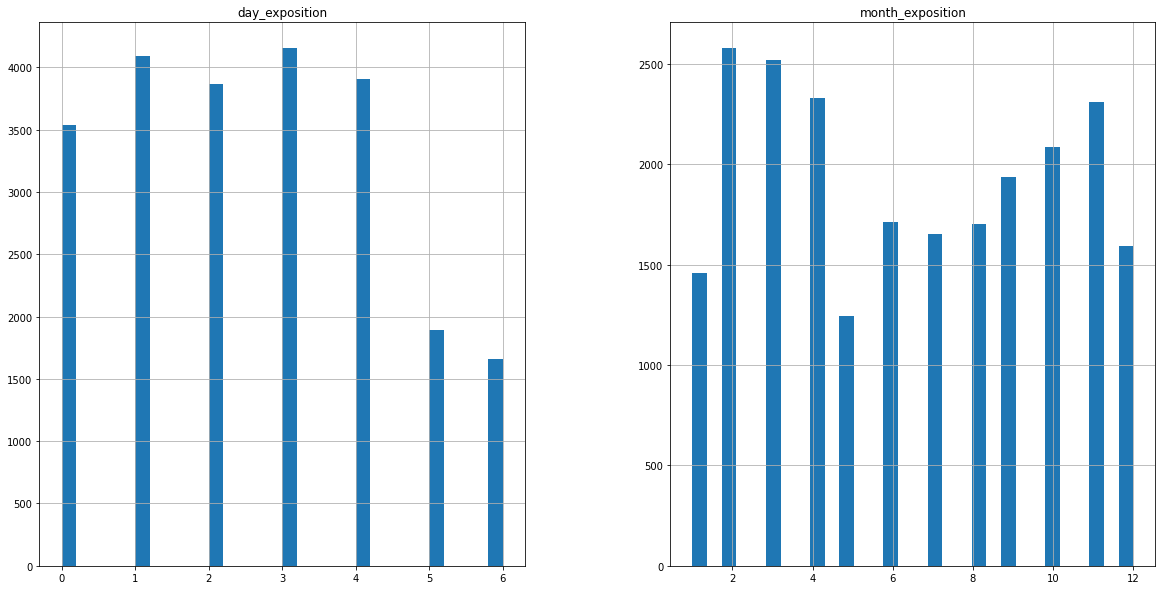

In [115]:
features2 = list(set(['day_exposition', 'month_exposition']))

df[features2].hist(bins=30, figsize=(20,10))
plt.show()

Больше всего объявлений публиковалось в феврале, марте, апреле и ноябре по будням. Может хмурые серые зимние будни дают о себе знать и люди начинают думать о продаже квартиры и о том, что надо бы перебраться туда, где теплее? Ну и в выходные люди обычно заняты другими делами и не очень-то хотят тратить драгоценные выходные на размещение объявлений. Лучше потратить кусочек рабочего времени на это. Этим же может объясняться меньшее количество объявлений в январе и мае - это месяцы с самым большим количеством выходных.

Изучим как быстро продавались квартиры.

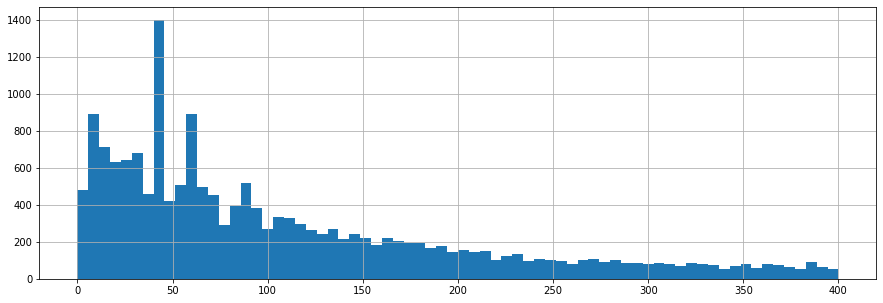

In [116]:
df['days_exposition'].hist(bins=70, range=(0,400), figsize=(15,5))
plt.show()

In [117]:
df['days_exposition'].describe()

count   20074.000
mean      178.699
std       217.277
min         1.000
25%        45.000
50%        94.000
75%       228.000
max      1580.000
Name: days_exposition, dtype: float64

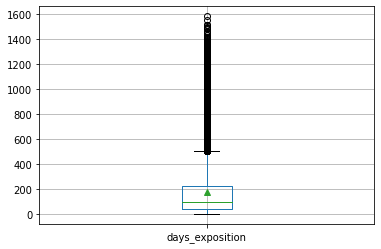

In [118]:
df.boxplot('days_exposition', showmeans=True)
#plt.ylim(0, 1600)
plt.show()

In [119]:
display(((df['days_exposition'] > 600).sum())/(df['days_exposition'].count().sum()))

0.05678987745342234

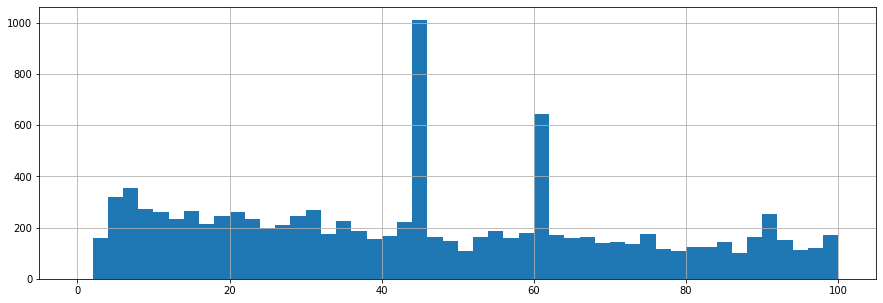

In [120]:
df['days_exposition'].hist(bins=50, range=(0,100), figsize=(15,5))
plt.show()

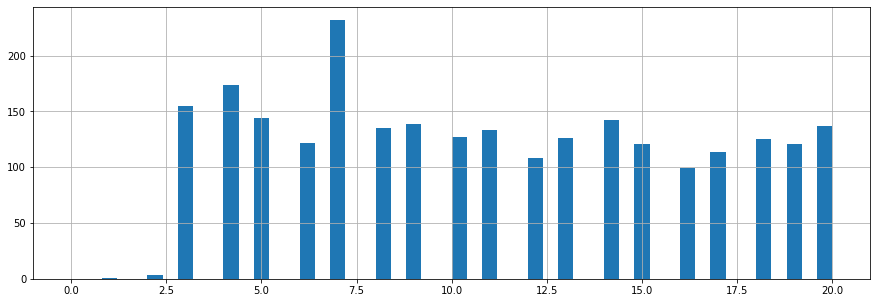

In [121]:
df['days_exposition'].hist(bins=50, range=(0,20), figsize=(15,5))
plt.show()

Видим, что большая часть квартир продается примерно около 1,5-2 месяцев. При этом имеются объявления со сроком продажи более 600 дней (от 1,5 лет) и таких объявлений 5%. Это говорит либо о том, что продавец не снял с сайта объявление по каким-либо причинам, либо квартира действительно так долго продается, что может говорить о том, что квартира в не очень хорошем состоянии, находится в маленьком городе/поселке/деревне, где спрос на квартиры очень мал.

Также видим на графиках резкие скачки в количестве проданных квартир на 45, 60 и 90 дней. Быть может объявления были размещены, квартиры проданы раньше, а вот само объявление было закрыто на сайте в день, когда заканчивался период его размещения.

Также имеются объявления, снятые с публикации на 1 и 2 день. Возможно продавец передумал или создал полностью новое объявление.

Посмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта.

#### Общая площадь, жилая и площадь кухни:

In [122]:
df[['total_area', 'living_area', 'kitchen_area', 'last_price']].corr()

,total_area,living_area,kitchen_area,last_price
total_area,1.000,0.922,0.561,0.785
living_area,0.922,1.000,0.337,0.670
kitchen_area,0.561,0.337,1.000,0.594
last_price,0.785,0.670,0.594,1.000


Видим, что наибольшая корреляция у цены с общей площадью, с жилой еще меньше, а с площадью кухни самая слабая. Чем ближе корреляция стремится к 1, тем взаимосвязь сильнее.

 - 0.785 - высокая корреляция
 - 0.670 и 0.594 - средняя корреляция

Посмотрим графики.

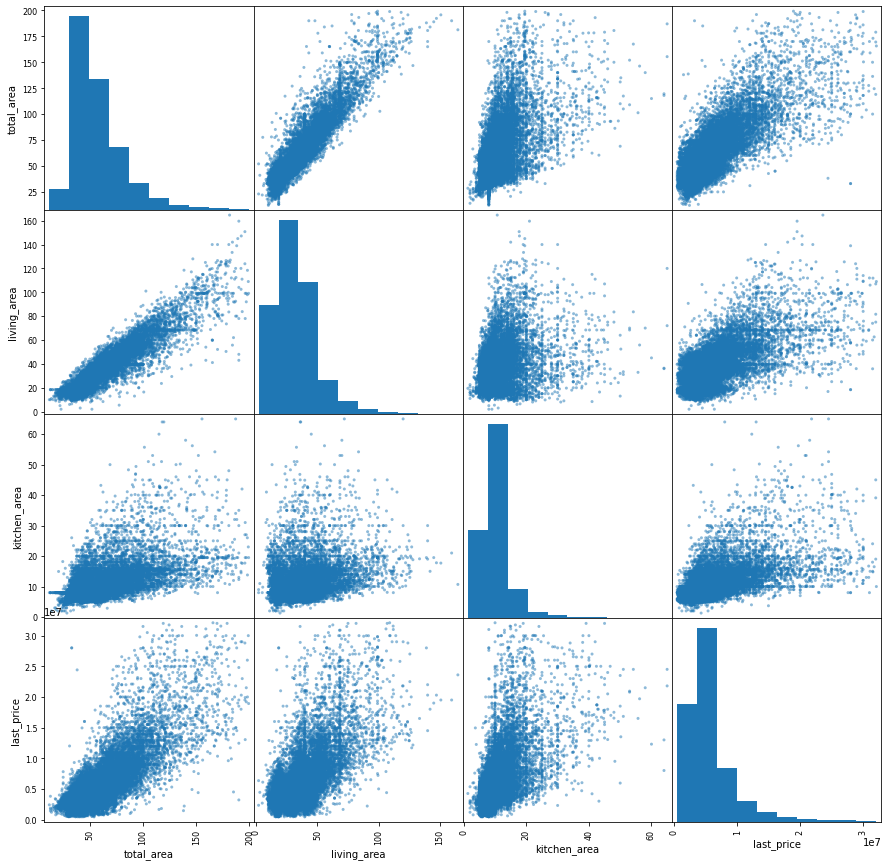

In [123]:
pd.plotting.scatter_matrix(df[['total_area', 'living_area', 'kitchen_area', 'last_price']], figsize=(15, 15))
plt.show()

На графиках видим аналогичную историю - у общей площади с ценой сильная положительная корреляция,  а у жилой и кухонной плоащи - средняя положительная.

#### Количество комнат:

In [124]:
filtered_rooms = df.groupby('rooms').median()['last_price'].reset_index().sort_values(by='last_price')

In [125]:
df['last_price'].corr(df['rooms'])

0.4891442138547162

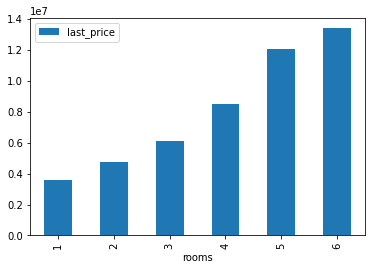

In [126]:
filtered_rooms.plot(x='rooms', y='last_price', kind='bar')
plt.show()

Корреляция от количества комнат есть, что вполне логично. Чем больше комнат, тем дороже квартира.

#### Этаж, на котором расположена квартира (первый, последний, другой):

In [127]:
filtered_floor = df.groupby('floor_category').median()['last_price'].reset_index().sort_values(by='last_price')

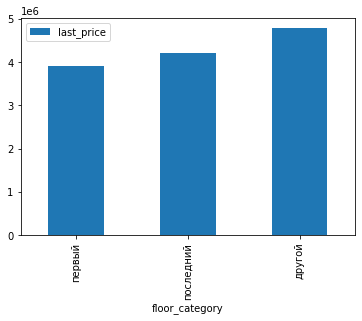

In [128]:
filtered_floor.plot(x='floor_category', y='last_price', kind='bar')
plt.show()

Видим, что квартиры на первом этаже стоят меньше.

#### Дата размещения (день недели, месяц, год):

In [129]:
filtered_day = df.groupby('day_exposition').median()['last_price'].reset_index().sort_values(by='day_exposition')

In [130]:
filtered_month = df.groupby('month_exposition').median()['last_price'].reset_index().sort_values(by='month_exposition')

In [131]:
filtered_year = df.groupby('year_exposition').median()['last_price'].reset_index().sort_values(by='year_exposition')

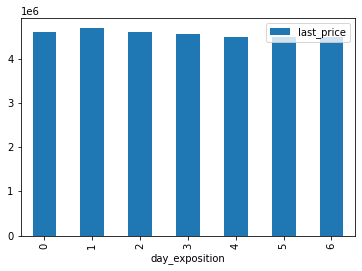

In [132]:
filtered_day.plot(x='day_exposition', y='last_price', kind='bar')
plt.show()

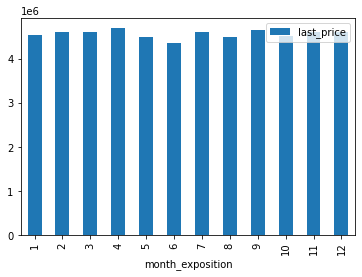

In [133]:
filtered_month.plot(x='month_exposition', y='last_price', kind='bar')
plt.show()

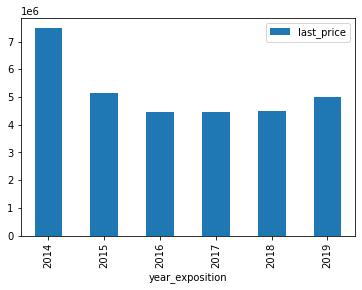

In [134]:
filtered_year.plot(x='year_exposition', y='last_price', kind='bar', sort_columns=True)
plt.show()

In [135]:
filtered_year_area = df.groupby('year_exposition').median()['total_area'].reset_index().sort_values('year_exposition')

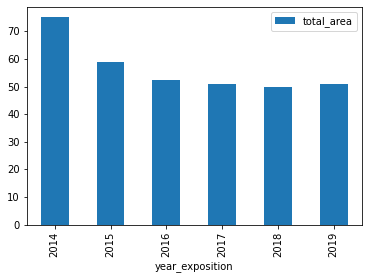

In [136]:
filtered_year_area.plot(x='year_exposition', 
                         y='total_area', 
                         kind='bar')
plt.show()

Цена не зависит от того в какой день недели опубликовали объявление.
По месяцам есть небольшая разница - в мае и июне цена просядает.

А вот по годам есть существенные изменения. Самая высокая цена была в 2014 году, что вполне логично - разразился кризис и цены начали резко падать, что мы видим в 2015 году. Рынок недвижимости отреагировал на кризис сокращением спроса, снижением темпов строительства, уменьшением рублевых цен, которые с учетом падения уровня жизни фактически выросли для большинства покупателей. В 2016 цены упали еще, но остались на том же уровне и только в 2019 году понемногу начали подниматься. Также мы видим, что и площадь продаваемых квартир также стала падать после 2014 года - это может быть связно и с тем, что люди пытались продать квартиры в маленьких городах и переехать в более крупные, а также с началом строительства крупных ЖК "человейников", так называемого доступного жилья, где и площадь и цена ниже.

In [137]:
filtered_year_count = df.groupby('year_exposition').median()['last_price'].reset_index().sort_values('year_exposition')

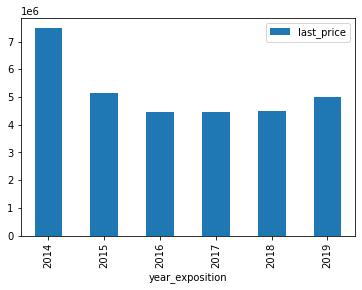

In [138]:
filtered_year_count.plot(x='year_exposition', 
                         y='last_price', 
                         kind='bar')
plt.show()

Собственно, по количеству объявлений этот кризис тоже очень просматривается. В 2014 и 2015 годах очень просел спрос, а в 2017-2019 спрос резко вырос, начался рост строительства новостроек и в 2019 из-за этого цены подросли.

#### Средняя цена одного квадратного метра

Едем дальше, посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [139]:
stat_square = df.pivot_table(index='locality_name', 
               values='price_square_meter', 
               aggfunc=('mean','median','count')).sort_values('count', ascending=False).head(10)

In [140]:
display(stat_square)

,count,mean,median
locality_name,,,
Санкт-Петербург,15207.000,110592.719,104166.000
Мурино,590.000,86087.056,86175.000
Кудрово,471.000,95325.726,95762.000
Шушары,439.000,78654.642,76829.000
Всеволожск,395.000,68616.592,65789.000
Пушкин,359.000,102594.298,99987.000
Колпино,337.000,75332.866,74722.000
Парголово,326.000,90331.840,91779.500
Гатчина,306.000,68799.176,67860.000


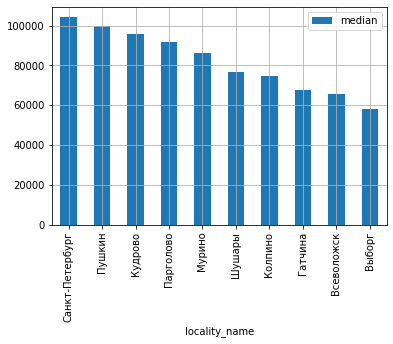

In [141]:
stat_square.sort_values('median', ascending=False).plot(y='median', kind='bar', grid=True)
plt.show()

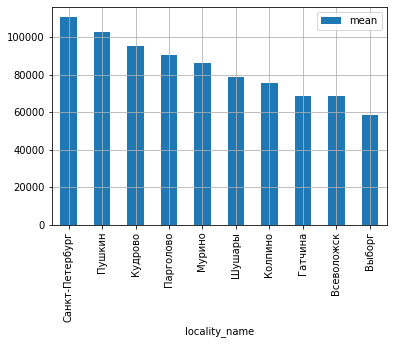

In [142]:
stat_square.sort_values('mean', ascending=False).plot(y='mean', kind='bar', grid=True)
plt.show()

Самая высокая средняя цена ожидаемо в Санкт-Петербурге, из остальных городов Ленинградской области из топ-10 по количеству объявлений самая высокая средняя цена в Пушкино, а самая низкая из тех же топ-10 - в Выборге.

#### Средняя цена каждого километра в Санкт-Петербурге:

Теперь выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.

In [143]:
df.query('locality_name == "Санкт-Петербург"')['cityCenters_nearest'].describe()

count   15155.000
mean    11782.521
std      4732.328
min       181.000
25%      8684.000
50%     12364.000
75%     14995.500
max     29493.000
Name: cityCenters_nearest, dtype: float64

Для начала выделим все объявления в Санкт-Петербурге в отдельный датафрейм и создадим в нем столбец с расстоянием до центра в километрах.

In [144]:
df_spb = df.query('locality_name == "Санкт-Петербург" & ~(cityCenters_nearest.isna())').copy()

In [145]:
df_spb['cityCenters_nearest_km'] = (df_spb['cityCenters_nearest']/1000).round()

In [146]:
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,price_square_meter,day_exposition,month_exposition,year_exposition,floor_category,cityCenters_nearest_km
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,False,False,False,25.000,0,Санкт-Петербург,18863.000,16028.000,1,482.000,2,755.000,NaN,от 100 до 150 м,120370,3,3,2019,другой,16.000
2,10,5196000,56.000,2015-08-20,2,2.550,5,34.300,4,False,False,False,8.300,0,Санкт-Петербург,21741.000,13933.000,1,90.000,2,574.000,558.000,от 50 до 100 м,92785,3,8,2015,другой,14.000
4,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,False,False,False,41.000,0,Санкт-Петербург,31856.000,8098.000,2,112.000,1,48.000,121.000,от 50 до 100 м,100000,1,6,2018,другой,8.000
7,5,7915000,71.600,2019-04-18,2,2.750,24,39.600,22,False,False,False,18.900,2,Санкт-Петербург,23982.000,11634.000,0,NaN,0,NaN,NaN,от 50 до 100 м,110544,3,4,2019,другой,12.000
9,18,5400000,61.000,2017-02-26,3,2.500,9,43.600,7,False,False,False,6.500,2,Санкт-Петербург,50898.000,15008.000,0,NaN,0,NaN,289.000,от 50 до 100 м,88524,6,2,2017,другой,15.000


Сгруппируем стоимость квадратного метра по отдаленности от центра в км и высчитаем среднее.

In [147]:
df_spb_grouped_km = df_spb.pivot_table(
    index='cityCenters_nearest_km', 
    values='price_square_meter',
    aggfunc='mean')

In [148]:
display(df_spb_grouped_km)

,price_square_meter
cityCenters_nearest_km,
0.000,122591.615
1.000,143274.401
2.000,127685.253
3.000,117002.399
4.000,125399.173
5.000,132539.545
6.000,132141.130
7.000,132734.737
8.000,123570.920


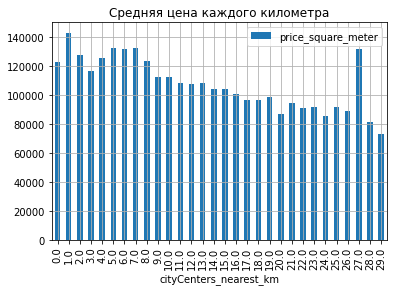

In [149]:
df_spb_grouped_km.plot(y='price_square_meter', kind='bar', grid=True, title = 'Средняя цена каждого километра')
plt.show()

Таким образом мы получили стоимость каждого километра в зависимости от отдаленности от центра. Видна явная зависимость - чем дальше от центра, тем дороже. Однако, виден выброс на 27 километре. По карте в 27 км от центра Санкт-Петербурга находится город Пушкин. Предполагаю, что некоторые продавцы при размещении объявления указывали город не Пушкин, а Санкт-Петербург. К тому же по стоимости квадратного метра Пушкин был как раз на втором месте после Санкт-Петербурга.

### Общий вывод

Итак, мы изучили рынок недвижимости Ленинградской области в период 2014-2019 гг.

Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо и возможно, заменили типы данных на необходимые для удобной работы, избавились от неявных дубликатов в названии населенных пунктов. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Были определены аномалии в данных параметрах. Далее изучили сами данные и обнаружили следующее:

Большая часть объявлений - это 1-2 комнатные квартиры в Санкт-Петербурге в 5-9 этажках в 12-15 километрах от центра и в 500 метрах от парков с прудами. Медианная стоимость квартир составляет 4,65 млн рублей.

Чаще всего люди публикуют объявления в ноябре, феврале, марте и апреле, что возможно связано с мрачной питерской погодой и желанием что-то изменить в этой жизни.

Большая часть квартир продавалась в период от 1,5 до 2 месяцев.

Выявили взаимосвязь цены квартиры от общей площади, количества комнат и этажа, на котором находится квартира. Чем выше этаж, больше комнат и общая площадь, тем стоимость квартиры дороже. Но на последнем и первом этажах квартиры дешевле.

Также выявили взаимосвязь стоимости квадратного метра от местоположения. Самый дорогой квадратный метр ожидаемо в центре Санкт-Петербурга, но и Пушкин не отстает - там самый дорогой квадратный метр по области.

В 2014 году начался экономический кризис, который также отразился на рынке недвижимости. Самая высокая цена на квартиры была в 2014 году, а затем цены начали резко падать, что мы видим в 2015 году. В 2016 цены упали еще, но остались на том же уровне и только в 2019 году понемногу начали подниматься. При этом количество объявлений в 2017 и 2018 резко увеличилось, предполагаю, что за счет строительства новых домов и попытки выйти из кризиса.